In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io as sio
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set_theme()
sns.set_context("paper")

In [25]:
model_dir = Path("./models/")
result_dir = Path("./result/")
fig_dir = Path("./paper/")
if not fig_dir.exists():
    fig_dir.mkdir()

In [26]:
def plot_model(model, fig_name, fig_dir, p_vmax=None, p_vmin=None, s_vmax=None, s_vmin=None, cmap="jet"):
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
#     plt.figure(figsize=(12,8))
    plt.figure()
    plt.subplot(221)
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, model['vp'].T/1e3, vmax=p_vmax, vmin=p_vmin, rasterized=True, shading='auto', cmap=cmap)
    plt.text(-0.1, 1.5, "(a)", ha='left', va='top', fontsize=10, transform = plt.gca().transAxes)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    
    plt.subplot(222)
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, model['init_vp'].T/1e3, vmax=p_vmax, vmin=p_vmin, rasterized=True, shading='auto', cmap=cmap)
    plt.text(-0.1, 1.5, "(b)", ha='left', va='top', fontsize=10, transform = plt.gca().transAxes)
    plt.xlabel("X (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('Vp(km/s)')
    cb.ax.tick_params(labelsize=7)
    
    plt.subplot(223)
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, model['vs'].T/1e3, vmax=s_vmax, vmin=s_vmin, rasterized=True, shading='auto', cmap=cmap)
    plt.text(-0.1, 1.5, "(c)", ha='left', va='top', fontsize=10, transform = plt.gca().transAxes)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')

    plt.subplot(224)
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, model['init_vs'].T/1e3, vmax=s_vmax, vmin=s_vmin, rasterized=True, shading='auto', cmap=cmap)
    plt.text(-0.1, 1.5, "(d)", ha='left', va='top', fontsize=10, transform = plt.gca().transAxes)
    plt.xlabel("X (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('Vs(km/s)')
    cb.ax.tick_params(labelsize=7)
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight', dpi=300)
    plt.show()

In [27]:
def plot_results(model, result_nn, result_BFGS, fig_name, fig_dir, p_vmax=None, s_vmax=None, p_vmin=None, s_vmin=None, cmap="jet"):
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    # plt.figure(figsize=(5,8))
    plt.figure()
    plt.subplot(221)
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, result_nn['cp']/1e3, vmax=p_vmax, vmin=p_vmin, rasterized=True, shading='auto', cmap=cmap)
    plt.text(-0.1, 1.5, "(a)", ha='left', va='top', fontsize=10, transform = plt.gca().transAxes)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')

    
    plt.subplot(222)
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, result_BFGS['cp']/1e3, vmax=p_vmax, vmin=p_vmin, rasterized=True, shading='auto', cmap=cmap)
    plt.text(-0.1, 1.5, "(b)", ha='left', va='top', fontsize=10, transform = plt.gca().transAxes)
    plt.xlabel("X (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('Vp(km/s)')
    cb.ax.tick_params(labelsize=7)
    
    plt.subplot(223)
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, result_nn['cs']/1e3, vmax=s_vmax, vmin=s_vmin, rasterized=True, shading='auto', cmap=cmap)
    plt.text(-0.1, 1.5, "(c)", ha='left', va='top', fontsize=10, transform = plt.gca().transAxes)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')

    plt.subplot(224)
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, result_BFGS['cs']/1e3, vmax=s_vmax, vmin=s_vmin, rasterized=True, shading='auto', cmap=cmap)
    plt.text(-0.1, 1.5, "(d)", ha='left', va='top', fontsize=10, transform = plt.gca().transAxes)
    plt.xlabel("X (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('Vs(km/s)')
    cb.ax.tick_params(labelsize=7)

    # plt.subplot(325)
    # im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, result_nn['rho']/1e3, vmax=s_vmax, vmin=s_vmin, rasterized=True, shading='auto', cmap=cmap)
    # plt.text(-0.1, 1.5, "(c)", ha='left', va='top', fontsize=10, transform = plt.gca().transAxes)
    # plt.xlabel("X (km)")
    # plt.ylabel("Z (km)")
    # plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    # plt.gca().xaxis.set_label_position('top') 
    # plt.gca().invert_yaxis()
    # plt.axis('scaled')

    # plt.subplot(326)
    # im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, result_BFGS['cs']/1e3, vmax=s_vmax, vmin=s_vmin, rasterized=True, shading='auto', cmap=cmap)
    # plt.text(-0.1, 1.5, "(d)", ha='left', va='top', fontsize=10, transform = plt.gca().transAxes)
    # plt.xlabel("X (km)")
    # plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    # plt.gca().xaxis.set_label_position('top') 
    # plt.gca().invert_yaxis()
    # plt.axis('scaled')
    # divider = make_axes_locatable(plt.gca())
    # cax = divider.append_axes("right", size="5%", pad=0.1)
    # cb = plt.colorbar(im, cax)
    # cb.ax.set_title('Vs(km/s)')
    # cb.ax.tick_params(labelsize=7)
    
    plt.tight_layout()
    plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight', dpi=300)
    plt.show()

In [28]:
def plot_result(result, model, fig_name, fig_dir, vmax=None, vmin=None, cmap="jet"):
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    idx = np.arange(0, model['nx'][0][0], int(np.floor(model['nx'][0][0]/5)))[1:-1]
#     plt.figure(figsize=(12,8))
    plt.figure()
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, result/1e3, vmax=vmax, vmin=vmin, rasterized=True, shading='auto', cmap=cmap)

    for i in range(len(idx)):
        plt.plot([x[idx[i]]/1e3, x[idx[i]]/1e3], [y[0]/1e3, y[-1]/1e3], "k", linewidth=0.6)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.1)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('km/s')
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+".pdf"), bbox_inches='tight', dpi=300)
    
    ## slice
    numbers = ["(i)", "(ii)", "(iii)", "(iv)", "(v)", "(vi)"]
#     plt.figure(figsize=(10,4))
    plt.figure()
    for i in range(len(idx)):
        plt.subplot(1,len(idx),i+1)
        plt.text(0.98, 0.98, f'{numbers[i]}', ha='right', va='top', fontsize="x-small", transform = plt.gca().transAxes)
        plt.plot(model["vp"][idx[i],:]/1e3, y/1e3, label="True")
        plt.plot(result.T[idx[i],:]/1e3, y/1e3, label=fig_name.split("/")[-1].split("_")[0])
        if i >= 1:
            plt.gca().set_yticklabels([])
        else:
            plt.ylabel("Z (km)")
        if i == len(idx)-1:
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize="x-small")
        plt.gca().invert_yaxis()
        plt.autoscale(enable=True, axis='y', tight=True)
    plt.gcf().text(0.5, 0., 'Velocity (km/s)', ha='center', va="top", fontsize='x-small')
    plt.show()

In [29]:
def plot_std(std, vp, model, model_true, fig_name, fig_dir, src=False, vmax=None, vmin=None, cmap="jet"):
    std = std
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    idx = np.arange(0, model['nx'][0][0], int(np.floor(model['nx'][0][0]/5)))[1:-1]
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    
#     plt.figure(figsize=(12,8))
    plt.figure()
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, np.abs(vp.T-model_true["vp"]).T/1e3,
                        vmax=np.max(np.abs(vp.T-model_true["vp"]).T)/1e3*0.6, rasterized=True, shading='auto', cmap=cmap)
    for i in range(len(idx)):
        plt.plot([x[idx[i]]/1e3, x[idx[i]]/1e3], [y[0]/1e3, y[-1]/1e3], "k",  linewidth=0.6)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.1)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('km/s')
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+"_std.png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+"_err.pdf"), bbox_inches='tight', dpi=300)
    
#     plt.figure(figsize=(12,8))
    plt.figure()
    if (vmax is not None) and (vmin is not None):
        im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, std/1e3, vmax=vmax, vmin=vmin, rasterized=True, shading='auto', cmap=cmap)
    else:
        im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, std/1e3, rasterized=True, shading='auto', cmap=cmap)
    for i in range(len(idx)):
        plt.plot([x[idx[i]]/1e3, x[idx[i]]/1e3], [y[0]/1e3, y[-1]/1e3], "k", linewidth=0.6)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().tick_params(top=True, left=True, labeltop=True, labelbottom=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.1)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('km/s')
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+"_std.png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+"_std.pdf"), bbox_inches='tight', dpi=300)    
    
    ## slice
    numbers = ["(i)", "(ii)", "(iii)", "(iv)", "(v)", "(vi)"]
#     plt.figure(figsize=(10,4))
    plt.figure()
    for i in range(len(idx)):
        plt.subplot(1,len(idx),i+1)
        plt.text(0.98, 0.98, f'{numbers[i]}', ha='right', va='top', fontsize="x-small", transform = plt.gca().transAxes)
        plt.plot(model_true["vp"][idx[i],:]/1e3, y/1e3, label="True")
        plt.plot(vp.T[idx[i],:]/1e3, y/1e3, label=fig_name.split("/")[-1].split("_")[0])
#         plt.errorbar(vp.T[idx[i],:]/1e3, y/1e3, xerr=std.T[idx[i],:]/1e3, label=fig_name.split("/")[-1].split("_")[0])
        plt.fill_betweenx(y/1e3, vp.T[idx[i],:]/1e3-std.T[idx[i],:]/1e3, vp.T[idx[i],:]/1e3+std.T[idx[i],:]/1e3, color="gray",  alpha=0.6)
        
        if i >= 1:
            plt.gca().set_yticklabels([])
        else:
            plt.ylabel("Z (km)")
        if i == len(idx)-1:
#             plt.legend(fontsize="x-small")
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)#, fontsize="x-small")
        plt.gca().invert_yaxis()
        plt.autoscale(enable=True, axis='y', tight=True)
    plt.gcf().text(0.5, 0., 'Velocity (km/s)', ha='center', va="top")#, fontsize='x-small')
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+"_std.png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+"_profile.pdf"), bbox_inches='tight', dpi=300)    
    plt.show()

In [30]:
def plot_slice(subdirs, model, smooth_model, fig_name, names=None,  src=False, vmax=None, vmin=None, cmap="jet"):
    
    fnames = []
    results = []
    for subdir in subdirs:
        fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
        loss = np.loadtxt(fname, delimiter=",")
        fname = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[len(loss)//10-1]
        fnames.append(fname)
        results.append(np.loadtxt(fname))
    
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    idx = np.arange(0, model['nx'][0][0], int(np.floor(model['nx'][0][0]/5)))[1:-1]
    
    linestyles = ["-.", "--", ":", (0, (3, 5, 1, 5, 1, 5)),]
    linewidths = [2, 2, 3, 3]
    numbers = ["(i)", "(ii)", "(iii)", "(iv)", "(v)", "(vi)"]
#     plt.figure(figsize=(8,5))
    plt.figure()
    for i in range(len(idx)):
        
        plt.subplot(1,len(idx),i+1)
        plt.text(0.98, 0.98, f'{numbers[i]}', ha='right', va='top', fontsize="x-small", transform = plt.gca().transAxes)
        plt.plot(model["vp"][idx[i],:]/1e3, y/1e3, label="True", alpha=1.0)#, linewidth=2)
        for j in range(len(subdirs)):
            if names is None:
                plt.plot(results[j].T[idx[i],:]/1e3, y/1e3, label=subdirs[j].split("/")[0], 
                         linestyle=linestyles[j])#, linewidth=linewidths[j])
            else:
                plt.plot(results[j].T[idx[i],:]/1e3, y/1e3, label=names[j], 
                         linestyle=linestyles[j])#, linewidth=linewidths[j])
        
        if i >= 1:
            plt.gca().set_yticklabels([])
        else:
            plt.ylabel("Z (km)")
        if i == len(idx)-1:
#             plt.legend(fontsize="xx-small")
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)#, fontsize="small")
        plt.gca().invert_yaxis()
        plt.autoscale(enable=True, axis='y', tight=True)

    plt.gcf().text(0.5, 0.00, 'Velocity (km/s)', ha='center', va="top")#, fontsize='small')
    plt.tight_layout()
#     plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight', dpi=300)
    plt.savefig(fig_dir.joinpath(fig_name+".pdf"), bbox_inches='tight', dpi=300)
    
    plt.show()

In [31]:
def plot_subdir(subdir, model_true, cmap="jet", std=False, model_smooth=None, vmax_std=None, vmin_std=None):
    fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
    loss = np.loadtxt(fname, delimiter=",")
    plt.figure()
    plt.semilogy(loss[:,0], loss[:,1])

    fname = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[len(loss)//10-1]
    print(f"loading {len(loss)//10} {fname}")
    inv_result = np.loadtxt(fname)
    plot_result(inv_result, model_true, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin, cmap=cmap)

    if std:
        std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[len(loss)//10-1]
        std = np.loadtxt(std)
        plot_std(std, inv_result, model_smooth, model_true, "_".join(subdir.split("/")), fig_dir, vmax=vmax_std, vmin=vmin_std)#, cmap=cmap)

    return inv_result

In [32]:
def MSE(x, y):
    mse = np.sqrt(np.mean((x - y)**2))
    print(f"MSE = {mse}")
    return mse

def SSIM(x, y):
    k1 = 0.01
    k2 = 0.03
    vmax = np.max(x)
    vmin = np.min(x)
    μx = np.mean(x)
    μy = np.mean(y)
    σx = np.sqrt(np.mean((x-μx)**2))
    σy = np.sqrt(np.mean((y-μy)**2))
    σxy = np.mean((x-μx)*(y-μy))
    c1 = ( k1 * (vmax-vmin) )**2
    c2 = ( k2 * (vmax-vmin) )**2
    ssim = (2*μx*μy + c1) * (2*σxy + c2) / ((μx**2 + μy**2 + c1) * (σx**2 + σy**2 + c2))
#     print((2*μx*μy + c1), (μx**2 + μy**2 + c1),(2*σxy + c2), (σx**2 + σy**2 + c2))
    print(f"SSIM = {ssim}")
    return ssim

def PSNR(x, y):
    mse = np.sqrt(np.mean((x - y)**2))
    vmax = np.max(x)
    vmin = np.min(x)
    maxI = vmax - vmin
    psnr = 20.0 * np.log10(maxI) - 10.0 * np.log10(mse)
    print(f"PSNR = {psnr}")
    return psnr

def metrics(x, y):
    mse = MSE(x, y)
    ssim = SSIM(x, y)
    psnr = PSNR(x, y)

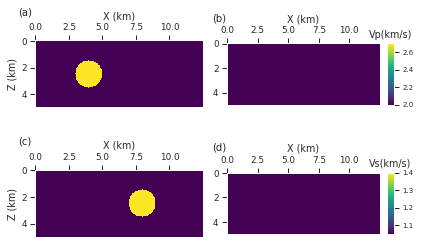

In [203]:
model_true = sio.loadmat(model_dir.joinpath("trade_off_model.mat"))
plot_model(model_true, "true_and_initial_model", fig_dir,  p_vmax=2.7, p_vmin=2.0, s_vmax=1.4, s_vmin=1.05, cmap="viridis")

TypeError: Dimensions of C (68, 202) are incompatible with X (250) and/or Y (100); see help(pcolormesh)

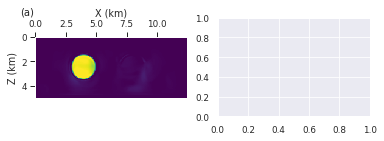

In [204]:
result_nn = sio.loadmat("default/results_trade/result41.mat")
result_BFGS = sio.loadmat("default/Results/cp112.mat")

plot_results(model_true, result_nn, result_BFGS, "result_model", fig_dir, p_vmax=2.7, p_vmin=2.0, s_vmax=1.4, s_vmin=1.05,  cmap="viridis")

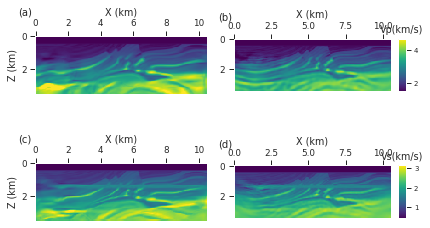

In [224]:
model = sio.loadmat("models/marmousi2-model-true.mat")

result_nn = sio.loadmat("results/result190.mat")
result_BFGS = sio.loadmat("default/Results/cp119.mat")
# result_BFGS = sio.loadmat("results/_.mat")
p_vmax = np.max(model['vp'])/1e3
s_vmax = np.max(model['vs'])/1e3
p_vmin = np.min(model['vp'])/1e3
s_vmin = np.min(model['vs'])/1e3



plot_results(model, result_nn, result_BFGS, "result_over_thrust_model", fig_dir, p_vmax=p_vmax, p_vmin=p_vmin, s_vmax=s_vmax+0.4, s_vmin=s_vmin+0.4, cmap="viridis")